In [34]:
#conda install -c plotly plotly=4.0

In [35]:
import plotly.graph_objects as go
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import sys
import json
import os

import numpy as np
import requests
import time
import datetime
import sys
import csv
import os
from pprint import pprint
from pandas import DataFrame
import datetime as dt

In [36]:
#State Coords
# File to Load 
state_coords_to_load = "input/state_cords.csv"

# Read the firearms data
coord_data = pd.read_csv(state_coords_to_load)
coord_data.head()

,state,latitude,longitude,code
0,Alabama,32.806671,-86.791130,AL
1,Alaska,61.370716,-152.404419,AK
2,Arizona,33.729759,-111.431221,AZ
3,Arkansas,34.969704,-92.373123,AR
4,California,36.116203,-119.681564,CA


In [37]:
# File to Load 
fireams_data_to_load = "input/nics-firearm-background-checks.csv"

# Read the firearms data
firearms_data = pd.read_csv(fireams_data_to_load)
firearms_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,0.0,0.0,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898
1,2019-06,Alaska,251.0,6.0,2465.0,2000.0,239.0,182,0.0,0.0,...,0.0,0.0,0.0,14.0,12.0,2.0,0.0,0.0,0.0,5557
2,2019-06,Arizona,5371.0,438.0,11375.0,5931.0,1309.0,656,0.0,14.0,...,4.0,0.0,0.0,13.0,7.0,5.0,2.0,0.0,0.0,26746
3,2019-06,Arkansas,2690.0,559.0,4653.0,3214.0,292.0,458,8.0,11.0,...,0.0,0.0,0.0,9.0,10.0,1.0,0.0,2.0,0.0,13956
4,2019-06,California,39303.0,0.0,38712.0,27050.0,4856.0,0,5040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115987


In [38]:
# Creating a subset DataFrame
bkgnd_chk_tot_data = pd.DataFrame(firearms_data,
                            columns=['month', 'state', 'totals'])

bct_data=bkgnd_chk_tot_data
bct_data.head(2)

,month,state,totals
0,2019-06,Alabama,42898
1,2019-06,Alaska,5557


In [39]:
# Grouping the results by month
bct_data_by_mo = bkgnd_chk_tot_data.groupby(['month'])

bc_per_month=bct_data_by_mo['totals'].sum()
bc_per_month.head()

month
1998-11     21176
1998-12    870722
1999-01    585974
1999-02    690215
1999-03    741687
Name: totals, dtype: int64

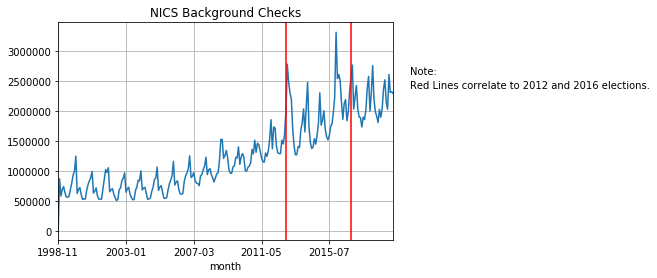

In [40]:
#Plots monthly Back
ax1 = bc_per_month.plot.line(x='month', y='totals')

#Creates Red Election Lines
plt.axvline(x=168, ymin=0, ymax=1, color="r")
plt.axvline(x=216, ymin=0, ymax=1, color="r")
# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Background Checks')

# Adding note on right hand side
textstr = ('Note:')
plt.text(.94, 0.7, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Red Lines correlate to 2012 and 2016 elections.')
plt.text(.94, 0.65, textstr, fontsize=10, transform=plt.gcf().transFigure)

#Save Figure
plt.savefig('output/t_chk_per_month_vline.png', bbox_inches="tight")

In [41]:
#Narrow view of background checks
bct_range = bct_data[(bct_data['month'] >='2011-01') & (bct_data['month'] <= '2018-1') ].groupby(['month'])['totals'].sum()
#bct_range.head()

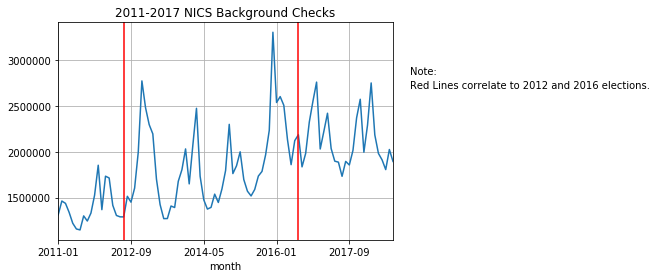

In [42]:
# Plotting background checks data
ax1 = bct_range.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)
plt.title('2011-2017 NICS Background Checks')

# Adding note on right hand side
textstr = ('Note:')
plt.text(.94, 0.7, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Red Lines correlate to 2012 and 2016 elections.')
plt.text(.94, 0.65, textstr, fontsize=10, transform=plt.gcf().transFigure)

# Adding vertical red lines
plt.axvline(x=18, ymin=0, ymax=1, color="r")
plt.axvline(x=66, ymin=0, ymax=1, color="r")
#plt.axvline(dt.datetime(2016, 11, 8 ))
plt.savefig('output/2011-5_2017-5_bct.png', bbox_inches="tight")

In [43]:
#Sort 2017
firearms_2017 = firearms_data[firearms_data['month'].str.contains('2017')]

#Registration sum 2017 & Set Index
registration_sum = firearms_2017.groupby(['state'])['totals'].sum()
registration_sum = registration_sum.reset_index()

#Hand Gun sum 2017 & Set Index
state_handguns_sum = firearms_2017.groupby(['state'])['handgun'].sum()
state_handguns_sum = state_handguns_sum.reset_index()

#Long Gun sum 2017 & Set Index
state_longguns_sum = firearms_2017.groupby(['state'])['long_gun'].sum()
state_longguns_sum = state_longguns_sum.reset_index()

#Permit sum 2017 & Set Index
permit_sum = firearms_2017.groupby(['state'])['permit'].sum()
permit_sum = permit_sum.reset_index()

#Merge all data frames
data_pair = pd.merge(registration_sum, state_handguns_sum, how="left", on=["state", "state"])
other_pair = pd.merge(permit_sum, state_longguns_sum, how="left", on=["state", "state"])
totals_df = pd.merge(data_pair, other_pair, how="left", on=["state", "state"])

#Show
totals_df.head()

,state,totals,handgun,permit,long_gun
0,Alabama,477345,97751.0,253338.0,86210.0
1,Alaska,80839,34556.0,2923.0,32648.0
2,Arizona,384930,153522.0,81734.0,99248.0
3,Arkansas,237629,72100.0,39473.0,76765.0
4,California,1570110,512465.0,689851.0,318133.0


In [44]:
#World Atlas.COM
# File to Load 
state_population_to_load = "input/state_populations.csv"

# Read the firearms data
population_data = pd.read_csv(state_population_to_load)
population_data.head()

,pop_rank,state,population
0,1,California,"39,536,653"
1,2,Texas,"28,304,596"
2,3,Florida,"20,984,400"
3,4,New York,"19,849,399"
4,5,Pennsylvania,"12,805,537"


In [45]:
# Combine the data into a single dataset with a left merge on "state"
data_pair = pd.merge(totals_df, population_data, how="left", on=["state", "state"])
df = pd.merge(data_pair, coord_data, how="left", on=["state", "state"])
df.head()

,state,totals,handgun,permit,long_gun,pop_rank,population,latitude,longitude,code
0,Alabama,477345,97751.0,253338.0,86210.0,24.0,"4,874,747",32.806671,-86.791130,AL
1,Alaska,80839,34556.0,2923.0,32648.0,48.0,"739,795",61.370716,-152.404419,AK
2,Arizona,384930,153522.0,81734.0,99248.0,14.0,"7,016,270",33.729759,-111.431221,AZ
3,Arkansas,237629,72100.0,39473.0,76765.0,32.0,"3,004,279",34.969704,-92.373123,AR
4,California,1570110,512465.0,689851.0,318133.0,1.0,"39,536,653",36.116203,-119.681564,CA


In [46]:
for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Total Handgun Background Checks 2017- ' + df['handgun'] + '<br>' + \
    'Population ' + df['population'] + '<br>' + \
    'Populations Rank ' + df['pop_rank']
    
plt = go.Figure(data=go.Choropleth(
    #state digraph = location code
    locations=df['code'],
    z=df['handgun'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Hundreds of Thousands"
))

plt.update_layout(
    title_text='2017 Handgun Background Checks Per State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)
#plt.savefig('output/handguns2017.png', bbox_inches="tight")
plt.show()

In [47]:
for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Total Long Gun Background Checks 2017- ' + df['long_gun'] + '<br>' + \
    'Population ' + df['population'] + '<br>' + \
    'Populations Rank ' + df['pop_rank']
    
plt = go.Figure(data=go.Choropleth(
    #state digraph = location code
    locations=df['code'],
    z=df['long_gun'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Hundreds of Thousands"
))

plt.update_layout(
    title_text='2017 Long Gun Background Checks Per State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)
#plt.savefig('output/longguns2017.png', bbox_inches="tight")
#plt.write_image('output/longguns2017.png')
plt.show()

In [48]:
for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Total Permits 2017' + df['permit'] + '<br>' + \
    'Population ' + df['population'] + '<br>' + \
    'Populations Rank ' + df['pop_rank']
    
plt = go.Figure(data=go.Choropleth(
    #state digraph = location code
    locations=df['code'],
    z=df['permit'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Millions"
))

plt.update_layout(
    title_text='2017 Permits Per State<br>Note: Kentucky performs monthly checks on concealed carry permit holders<br>(Hover for breakdown)(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)
#plt.savefig('output/permits2017.png', bbox_inches="tight")
plt.show()

In [49]:
for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Total Background Checks 2017' + df['totals'] + '<br>' + \
    'Population ' + df['population'] + '<br>' + \
    'Populations Rank ' + df['pop_rank']
    
plt = go.Figure(data=go.Choropleth(
    #state digraph = location code
    locations=df['code'],
    z=df['totals'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Millions"
))

plt.update_layout(
    title_text='2017 Background Checks Per State<br>Note: Kentucky performs monthly checks on concealed carry permit holders <br>(Hover for breakdown)',
    #title_text=('Note: Kentucky performs monthly checks on Concealed Permit Holders'),
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)
#plt.savefig('output/transactions2017.png', bbox_inches="tight")
#plt.savefig('output/transactions2017.png')
plt.show()

In [50]:

import matplotlib.pyplot as plt


In [51]:
## get key from os
#api_key = os.environ.get('weather_api_key')
api_key = os.environ.get('gov_data_api_key')
#print(api_key)



#url = 'https://api.usa.gov/crime/fbi/sapi/api/participation/national?'
url = 'https://api.usa.gov/crime/fbi/sapi/api/participation/national?'
#url = 'https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2015/2019?'
query_url = url + 'api_key=' + 'iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
print(query_url)

https://api.usa.gov/crime/fbi/sapi/api/participation/national?api_key=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv


In [52]:
crime_data = requests.get(query_url).json()

In [53]:
print(json.dumps(crime_data, indent=4, sort_keys=True))

{
    "pagination": {
        "count": 39,
        "page": 0,
        "pages": 1,
        "per_page": 0
    },
    "results": [
        {
            "active_agency_count": 21994,
            "agency_count_asr_submitting": 13694,
            "agency_count_hc_submitting": 16300,
            "agency_count_leoka_submitting": 6564,
            "agency_count_nibrs_submitting": 7102,
            "agency_count_pe_submitting": 16784,
            "agency_count_srs_submitting": 9696,
            "covered_agency_count": 1,
            "csv_header": "data_year,population,total_agency_count,published_agency_count,active_agency_count,covered_agency_count,population_covered,agency_count_nibrs_submitting,agency_count_leoka_submitting,agency_count_pe_submitting,agency_count_srs_submitting",
            "data_year": 2017,
            "nibrs_population_covered": 109672672,
            "population": 335302926,
            "population_covered": 0,
            "published_agency_count": 16783,
            "t

In [54]:
crime_data["results"][0]

{'data_year': 2017,
 'population': 335302926,
 'total_agency_count': 18642,
 'published_agency_count': 16783,
 'active_agency_count': 21994,
 'covered_agency_count': 1,
 'population_covered': 0,
 'agency_count_nibrs_submitting': 7102,
 'agency_count_leoka_submitting': 6564,
 'agency_count_pe_submitting': 16784,
 'agency_count_srs_submitting': 9696,
 'agency_count_asr_submitting': 13694,
 'agency_count_hc_submitting': 16300,
 'nibrs_population_covered': 109672672,
 'total_population': 335302926,
 'csv_header': 'data_year,population,total_agency_count,published_agency_count,active_agency_count,covered_agency_count,population_covered,agency_count_nibrs_submitting,agency_count_leoka_submitting,agency_count_pe_submitting,agency_count_srs_submitting'}

In [55]:
data_dict = crime_data['results']

In [56]:
df = pd.DataFrame(data_dict)
#df = df.drop(columns=['incident_count'])
df['data_year'] = df['data_year'].apply(np.int64)
df = df.sort_values('data_year')
#df.head(8)

#df.to_csv('offense_api_data.csv', header=True, index=True, index_label= 'Index')
df.head(2)

,active_agency_count,agency_count_asr_submitting,agency_count_hc_submitting,agency_count_leoka_submitting,agency_count_nibrs_submitting,agency_count_pe_submitting,agency_count_srs_submitting,covered_agency_count,csv_header,data_year,nibrs_population_covered,population,population_covered,published_agency_count,total_agency_count,total_population
38,23303,10022,0,0,0,14036,14034,0,"data_year,population,total_agency_count,publis...",1979,0,225960164,0,14033,22594,225960164
37,23301,9623,0,0,0,14155,14153,0,"data_year,population,total_agency_count,publis...",1980,0,231563235,0,14152,22484,231563235


In [57]:
# Normalize NIBRS Violent Crime data to same years as Background Checks
df_mo = df[(df['data_year'] >= 1998 ) & (df['data_year'] <= 2019)].groupby(['data_year'])['total_agency_count'].sum()
#df_mo.head()

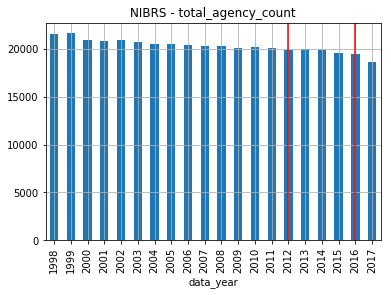

In [58]:
# Plot the National Incident Based Reporting System (NIBRS) - Violent Crimes Data 
ax1 = df_mo.plot.bar(x='data_year', y='total_agency_count')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NIBRS - total_agency_count')
#plt.xlabel('x label text')
#plt.ylabel('y label text')

plt.axvline(x=14, ymin=0, ymax=1, color="r")
plt.axvline(x=18, ymin=0, ymax=1, color="r")

#plt.savefig('output/NIBRS_Violent_Crimes.png', bbox_inches="tight")

In [59]:
# File to Load 
firearm_mortality_data = "input/firearm_mortality_Updated1.csv"

# Read the firearms data
mortality_data = pd.read_csv(firearm_mortality_data)
#mortality_data.head()

In [60]:
 mortality_data=mortality_data.drop(columns=['URL']).dropna()
# mortality_data.head()

In [61]:
'1,000'.replace(',','')
#mortality_data.dtypes

'1000'

In [62]:
mortality_data['YEAR']=mortality_data['YEAR'].astype(str)
mortality_data['DEATHS']=mortality_data['DEATHS'].str.replace(',','').astype(float)
mortality_data.head()

,YEAR,STATE,RATE,DEATHS
0,2017,Alabama,22.9,1124.0
1,2017,Alaska,24.5,180.0
2,2017,Arizona,15.8,1134.0
3,2017,Arkansas,20.3,613.0
4,2017,California,7.9,3184.0


In [63]:
# File to Load 
fireams_data_to_load = "input/nics-firearm-background-checks.csv"

# Read the firearms data
firearms_data = pd.read_csv(fireams_data_to_load)
#firearms_data.head()

In [64]:
mortality_data_grp=mortality_data.groupby(['STATE','YEAR'])['DEATHS'].mean()
#mortality_data_grp.head(10)

In [65]:
mortality_data.describe()

,RATE,DEATHS
count,250.000000,250.000000
mean,12.252400,713.616000
std,4.726174,700.901454
min,2.100000,28.000000
25%,9.225000,194.250000
50%,12.050000,516.500000
75%,15.650000,984.250000
max,24.500000,3513.000000


Text(0.5, 60.0, 'Firearm Related Deaths')

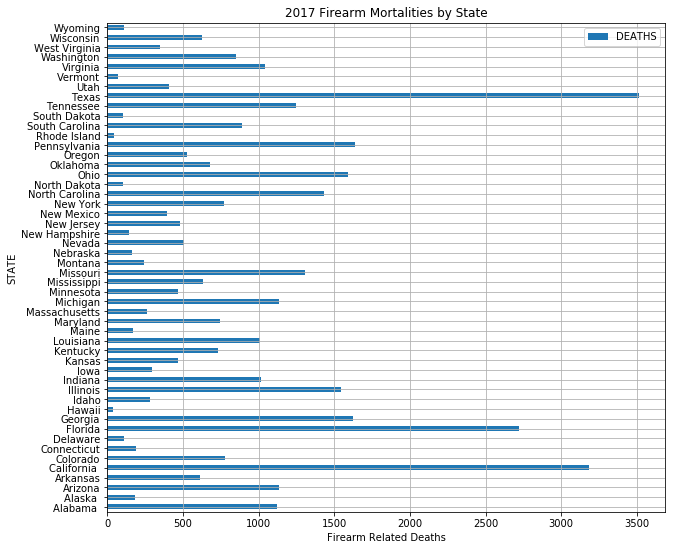

In [66]:
mortality_year=mortality_data.loc[mortality_data['YEAR']=='2017']
mortality_year
mortality_year.plot.barh(x='STATE', y='DEATHS',figsize=(10,9), legend=True)

# Adding grid, title, and labels
plt.grid(True)
plt.title('2017 Firearm Mortalities by State')

plt.savefig('output/2017_Mortalities_by_State.png', bbox_inches="tight")

plt.xlabel('Firearm Related Deaths')
#plt.ylabel('y label text')
